<a href="https://colab.research.google.com/github/Abdulrahmann-Omar/PRODIGY_ML_02/blob/main/PRODIGY_ML_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

# Display the first few rows of the dataframe
print(df.head())



   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:

# Display the summary statistics
print(df.describe())


       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [ ]:

# Display the column names
print(df.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


###Data PreProcessing

In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [ ]:
data = pd.get_dummies(df, drop_first=True)
data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,True
1,2,21,15,81,True
2,3,20,16,6,False
3,4,23,16,77,False
4,5,31,17,40,False
...,...,...,...,...,...
195,196,35,120,79,False
196,197,45,126,28,False
197,198,32,126,74,True
198,199,32,137,18,True


In [ ]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [ ]:
# Determine the optimal number of clusters using the Elbow method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

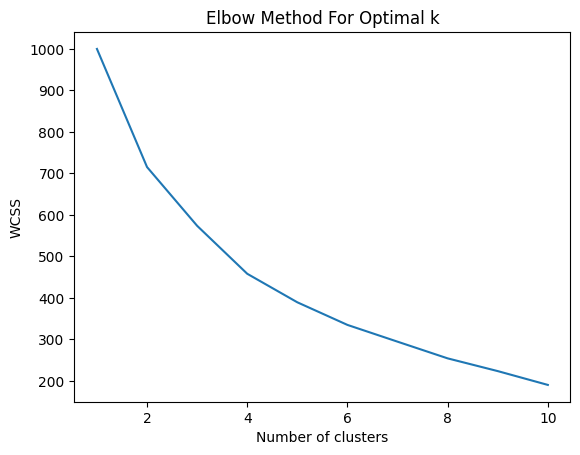

In [ ]:
# Plot the Elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
k = 4 # the knee of Elbow Method in the plot
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(scaled_data)

# Add cluster information to the original data
data['Cluster'] = y_kmeans


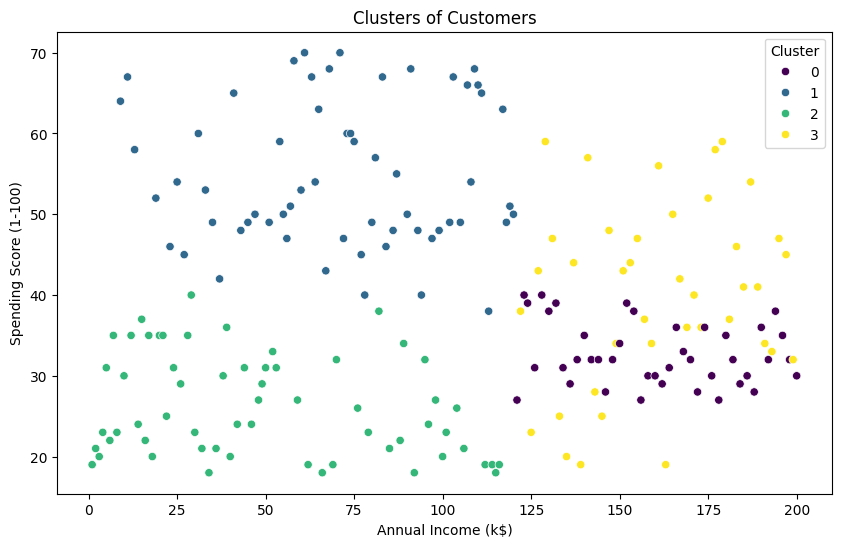

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=data['Cluster'], palette='viridis')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


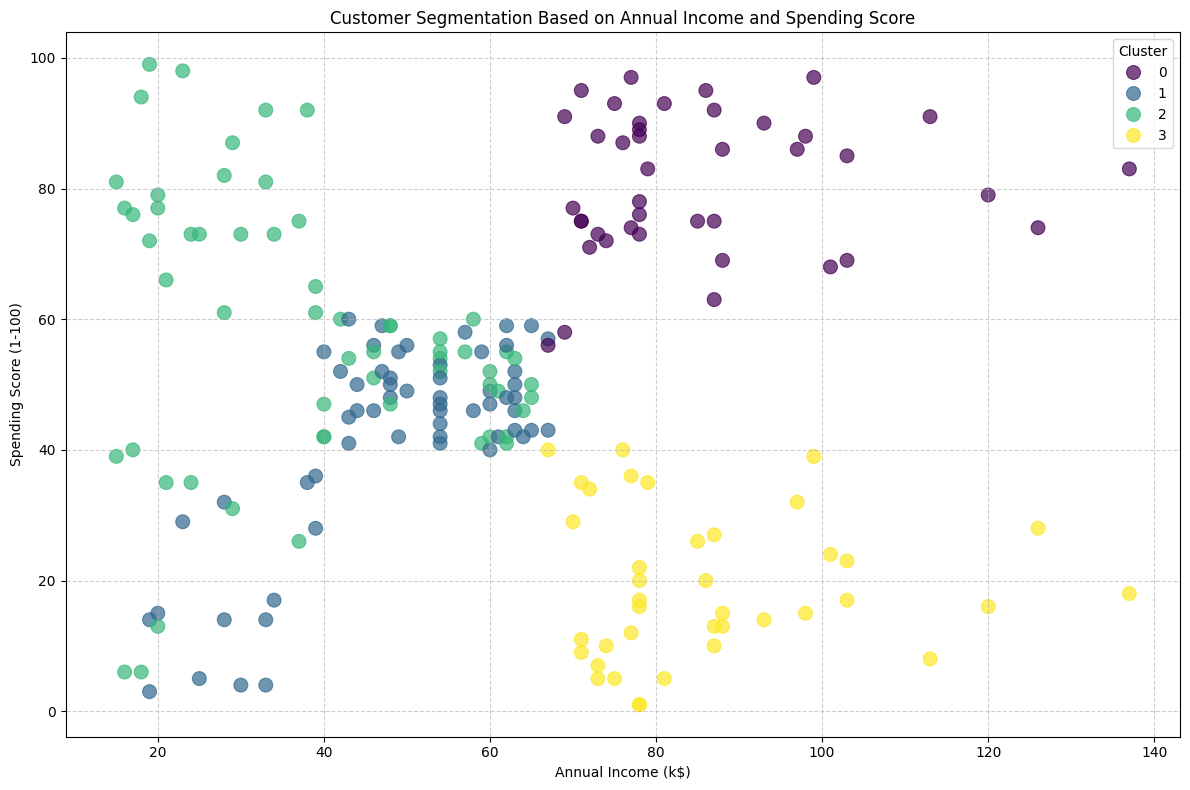

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='viridis',
    data=data,
    s=100,
    alpha=0.7,
    edgecolor=None
)
plt.title('Customer Segmentation Based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# Plotly interactive scatter plot
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(data_frame=data,
                 x='Annual Income (k$)',  # Ensure these column names are correct
                 y='Spending Score (1-100)',  # Ensure these column names are correct
                 color='Cluster',
                 color_continuous_scale='viridis',
                 labels={'Annual Income (k$)': 'Annual Income (k$)',
                         'Spending Score (1-100)': 'Spending Score (1-100)',
                         'Cluster': 'Cluster'},
                 title='Customer Segmentation with Cluster Centers')

# Add cluster centers
centers = kmeans.cluster_centers_
# Reverse the scaling
centers = scaler.inverse_transform(centers)

# Plot cluster centers
fig.add_trace(go.Scatter(x=centers[:, 0], y=centers[:, 1],
                         mode='markers+text',
                         marker=dict(size=15, color='red', symbol='x'),
                         text=['Center {}'.format(i) for i in range(k)],
                         textposition='top center',
                         name='Cluster Centers'))

# Update layout
fig.update_layout(title='Customer Segmentation with Cluster Centers',
                  xaxis_title='Annual Income (k$)',
                  yaxis_title='Spending Score (1-100)',
                  legend_title='Cluster')

# Show interactive plot
fig.show()